# **Laboratorio 8: Ready, Set, Deploy! 👩‍🚀👨‍🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Renzo Zanca
- Nombre de alumno 2: J.Vicente Onetto

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/RenzoZanca/MDS7202/tree/lab8)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [1]:
import pandas as pd

df = pd.read_csv('./water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
print(f"shape: {df.shape}")
print("NULL VALUES:")
print(df.isna().sum())
print("POTABILITY COUNT:")
print(df['Potability'].value_counts())

shape: (3276, 10)
NULL VALUES:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
POTABILITY COUNT:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import pandas as pd

df = pd.read_csv('./water_potability.csv')

rs = 42 # random state
train_val, test = train_test_split(df, test_size=0.1, random_state=rs)
train, val = train_test_split(train_val, test_size=2/9, random_state=rs)

X_train, y_train = train.drop(columns=['Potability']), train['Potability']
X_val, y_val = val.drop(columns=['Potability']), val['Potability']
X_test, y_test = test.drop(columns=['Potability']), test['Potability']

imputer = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean'))
])
imputer.set_output(transform="pandas")

baseline_pipeline = Pipeline([
    ('imputer', imputer),
    ('classifier', XGBClassifier(random_state=rs))
])

baseline_pipeline.fit(X_train, y_train)
y_pred_baseline = baseline_pipeline.predict(X_val)
print(classification_report(y_val, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       391
           1       0.60      0.42      0.49       265

    accuracy                           0.65       656
   macro avg       0.64      0.62      0.61       656
weighted avg       0.65      0.65      0.64       656



In [ ]:
import mlflow
from mlflow.models.signature import infer_signature
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import pickle
import os
import xgboost
import sklearn
import optuna
from optuna.visualization import (
    plot_optimization_history,
    plot_parallel_coordinate,
)
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings("ignore")

optuna.logging.set_verbosity(optuna.logging.WARNING)

# nombre del experimento
experiment_name = f"Optuna_XGBoost_{rs}"
mlflow.set_experiment(experiment_name)

def objective(trial):
    # hiperparámetros
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)  
    max_depth = trial.suggest_int("max_depth", 2, 6)  
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)  
    max_leaves = trial.suggest_int("max_leaves", 10, 50)  
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.6, 1.0)  
    min_child_weight = trial.suggest_int("min_child_weight", 3, 10)  
    reg_alpha = trial.suggest_float("reg_alpha", 0.0, 10.0)
    reg_lambda = trial.suggest_float("reg_lambda", 1.0, 10.0)

    run_name = f"XGBoost lr={learning_rate:.3f}, md={max_depth}, ne={n_estimators}"
    
    with mlflow.start_run(run_name=run_name, nested=True):
        params = {
            'learning_rate': learning_rate,
            'max_depth': max_depth,
            'n_estimators': n_estimators,
            'max_leaves': max_leaves,
            'colsample_bytree': colsample_bytree,
            'min_child_weight': min_child_weight,
            'reg_alpha': reg_alpha,
            'reg_lambda': reg_lambda,
            'eval_metric': 'logloss',
            'use_label_encoder': False
        }

        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('classifier', XGBClassifier(**params, random_state=rs))
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        f1 = f1_score(y_val, y_pred, average='macro')

        mlflow.log_params(params)
        mlflow.log_metric("valid_f1", f1)

        input_example = X_val.iloc[:1]
        signature = infer_signature(X_val, y_pred[:1])

        mlflow.sklearn.log_model(
            pipeline,
            artifact_path="model",
            input_example=input_example,
            signature=signature
        )
        mlflow.sklearn.log_model(pipeline, artifact_path="model")

        return f1

def get_best_model(experiment_id):
    runs = mlflow.search_runs([experiment_id])
    best_model_id = runs.sort_values("metrics.valid_f1", ascending=False)["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")
    return best_model

def optimize_model():
    study = optuna.create_study(direction="maximize", sampler=TPESampler(seed=rs))
    with mlflow.start_run(run_name="Optuna XGBoost Optimization") as run:
        study.optimize(objective, timeout=600)

        # log de mejores hiperparámetros
        mlflow.log_params(study.best_trial.params)
        mlflow.log_metric("best_valid_f1", study.best_value)

        # guardar visualizaciones de historial de optimización
        os.makedirs("plots", exist_ok=True)
        fig1 = plot_optimization_history(study)
        fig2 = plot_parallel_coordinate(study)
        fig1.write_image("plots/opt_history.png")
        fig2.write_image("plots/parallel_coordinate.png")
        mlflow.log_artifact("plots/opt_history.png", artifact_path="plots")
        mlflow.log_artifact("plots/parallel_coordinate.png", artifact_path="plots")

        # cargar y guardar mejor modelo
        experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
        best_model = get_best_model(experiment_id)
        os.makedirs("models", exist_ok=True)
        with open("models/best_model.pkl", "wb") as f:
            pickle.dump(best_model, f)
        mlflow.log_artifact("models/best_model.pkl", artifact_path="models")

        # guardar importancia de variables
        xgb_model = best_model.named_steps['classifier']
        importances = xgb_model.feature_importances_
        features = X_train.columns
        importance_df = pd.DataFrame({
            "feature": features,
            "importance": importances
        }).sort_values(by="importance", ascending=False)

        plt.figure(figsize=(8, 6))
        sns.barplot(data=importance_df, x="importance", y="feature")
        plt.title("Feature Importances")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.savefig("plots/feature_importance.png")

        # log de versiones
        mlflow.log_param("xgboost_version", xgboost.__version__)
        mlflow.log_param("sklearn_version", sklearn.__version__)
        mlflow.log_param("optuna_version", optuna.__version__)

        print("Best trial:", study.best_trial.params)
        print("Best F1 score:", study.best_value)

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.


### Respuestas

Comando para crear imágen:

```
docker build -t potabilidad-api .
```


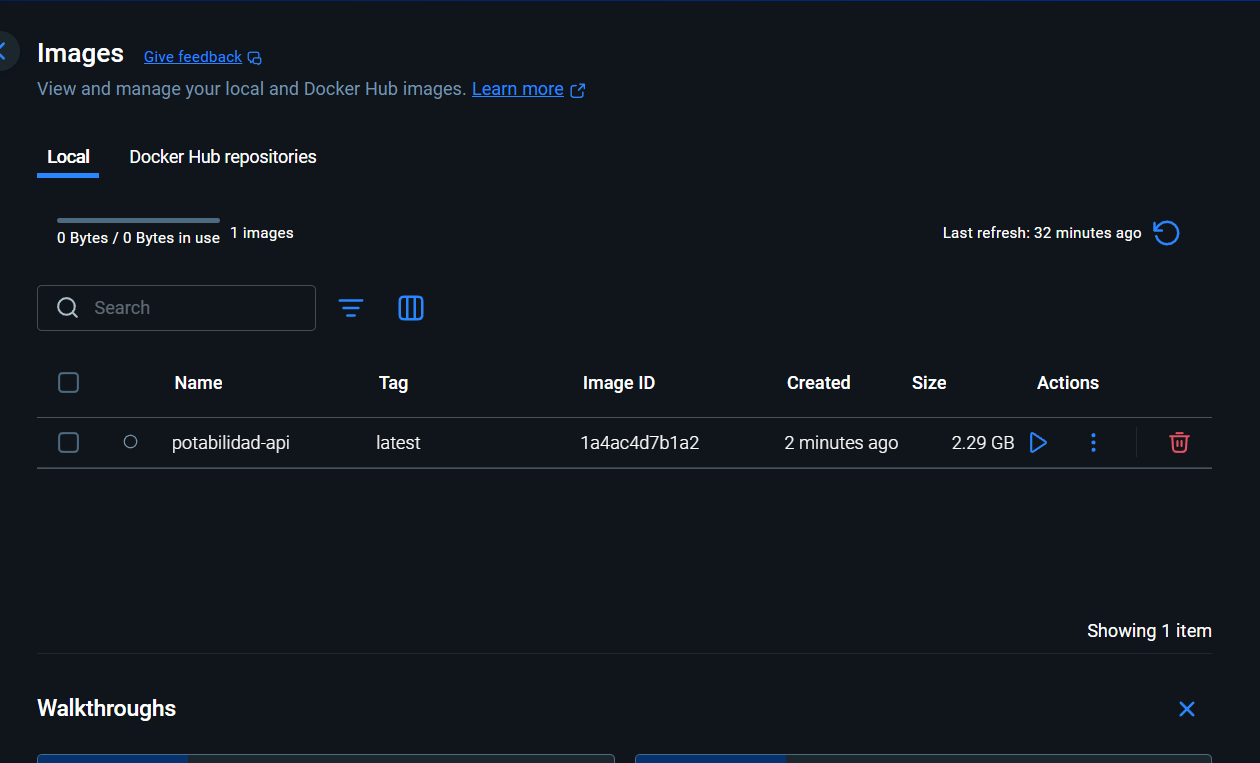

Comando para correr container:

```
docker run -d -p 8000:8000 -v $(pwd)/models:/app/models --name potabilidad_cont potabilidad-api
```

Luego se pueden visualizar los logs en docker desktop:

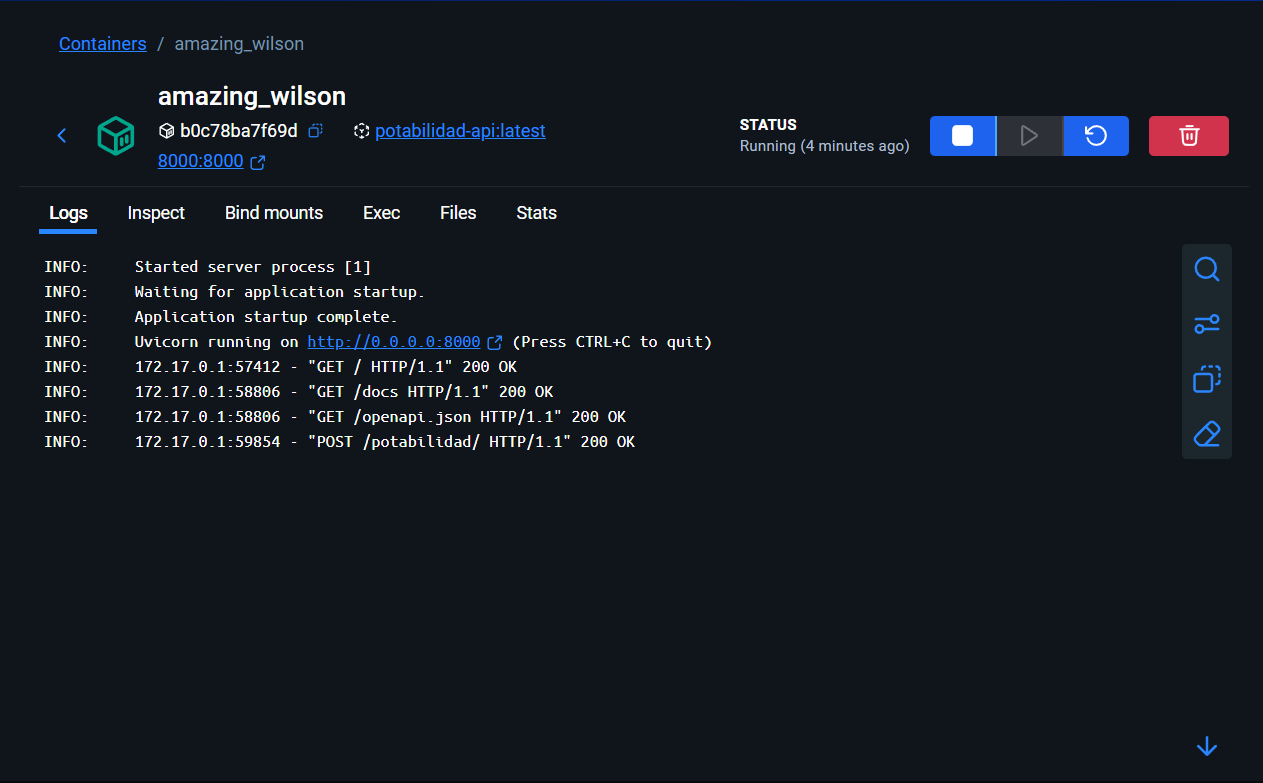
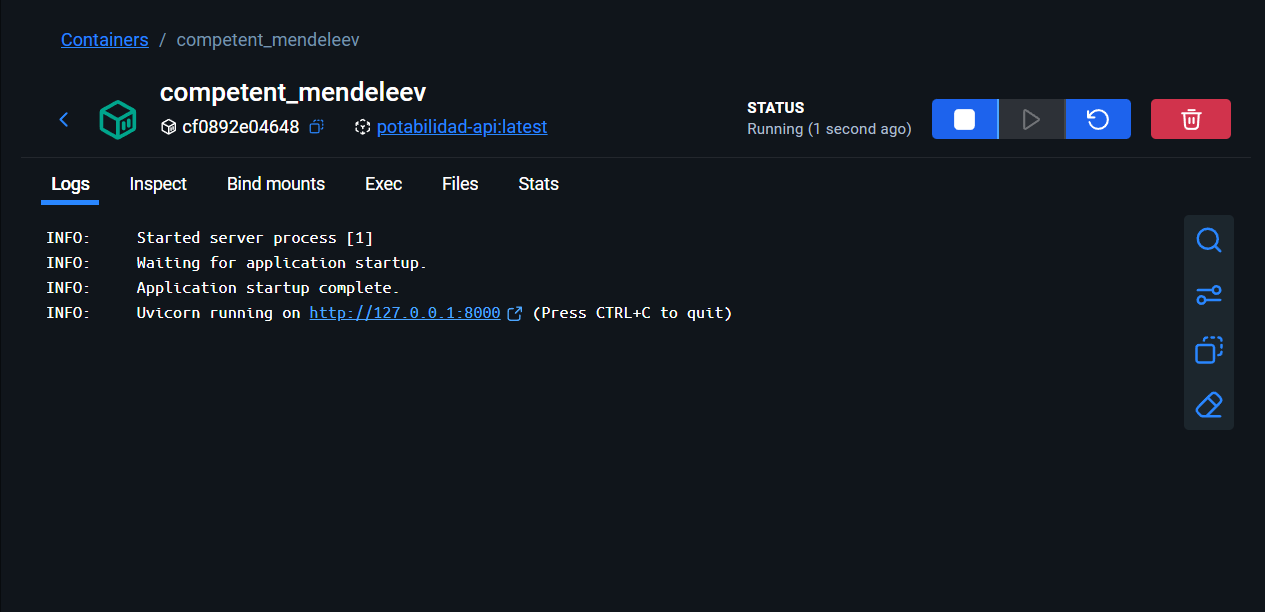

5. El contenedor es liviano ya que utiliza una imagen reducida (slim). Además no instala herramientas ni entornos pesados. Como recursos tiene un modelo de ML de clasificación y el despligue con FastAPI, lo cual no es tan pesado en comparación a otros casos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

## **RESPUESTAS: 3.2 Preguntas de Smapina**

1. Docker es una plataforma de software que proporciona contenedores ligeros para desarrollar, enviar y ejecutar aplicaciones. Las máquinas virtuales (VM) son sistemas operativos completos que se ejecutan en un host físico. Docker es más liviano y rápido porque no requiere un sistema operativo completo, sino que comparte el kernel del host; las VM ofrecen un aislamiento más fuerte (Kernel separado) pero consumen mucho más espacio y tardan más en arrancar.

2. Con Docker, defines explícitamente la imagen (base OS, Python, versiones de librerías) en el Dockerfile. Así la aplicación se ejecuta siempre en el mismo entorno, independientemente de la máquina host, lo que facilita la replicación y la portabilidad. Además, como cada container está aislado, se puede tener contenedores con diferentes versiones, sin tener conflictos. En resumen, docker permite tener todo el entorno, librerías, configuraciones, etc. en un solo archivo, lo que hace que sea muy fácil de compartir y usar en cualquier máquina. En local en cambio, hay que tener todo instalado y estar atento a conflictos y las variables de entorno. 

3. En el Dockerfile se describe paso a paso cómo construir la imagen: base OS, intérprete, copia de archivos, instalación de requirements.txt, variables de entorno, comandos de inicio, etc. Una vez construida la imagen, es reproducible y se puede ejecutar en cualquier máquina con docker instalado. Al fijar versiones en el requirements.txt y usar un entorno aislado, no se depende de librerías o versiones del host. Docker permite definir ENV en el Dockerfile (o pasar con -e) de modo que la configuración (API keys, credenciales) se manejan igual en local, staging y producción, simplemente cambiando variables, sin alterar la imagen. En resumen, la imagen Docker funciona idéntica en cualquier host porque encapsula el SO base, la aplicación, las librerías y la configuración mínima, eliminando diferencias de entorno.

4. Un volume es un directorio/datos que vive fuera del contenedor (en el host o en un driver de volume), pero que se monta dentro del contenedor. Sirve para que, al eliminar o recrear el contenedor, los datos (bases, logs, archivos generados) no se pierdan. Los volumenes "extraen" los datos del ciclo de vida del contenedor, asegurando que los archivos persistan aunque el contenedor se destruya o actualice.

5. Un dockerfile es un archivo con instrucciones para “armar” la imagen (imagen base, copiar código, instalar dependencias, exponer puertos, comando de arranque). Un docker-compose.yml es un archivo YAML para orquestar varios servicios/contendores juntos (build de la imagen, puertos, volúmenes, dependencias entre contenedores) con un solo comando (docker-compose up).  